# URBAN SOUND CLASSIFICATION

## STEP 1 - Importing Libraries

In [183]:
#Basic Libraries

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pd.plotting.register_matplotlib_converters()

%matplotlib inline
%pylab inline

#Classification and Model libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

#Project Specific Libraries

import librosa
import librosa.display
import glob 
import skimage
import struct
from scipy.io import wavfile as wav
import matplotlib.pyplot as plt
import IPython.display as ipd

Populating the interactive namespace from numpy and matplotlib


## STEP 2 - Data Analysis

In [5]:
df = pd.read_csv("C:/Users/Aniket/Desktop/PERSONAL PROJECTS/Urban Sound Classification/Dataset/UrbanSound8K.csv")
df.head(10)

slice_file_name    fsID      start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032   0.000000   0.317551         1     5        3   
1  100263-2-0-117.wav  100263  58.500000  62.500000         1     5        2   
2  100263-2-0-121.wav  100263  60.500000  64.500000         1     5        2   
3  100263-2-0-126.wav  100263  63.000000  67.000000         1     5        2   
4  100263-2-0-137.wav  100263  68.500000  72.500000         1     5        2   
5  100263-2-0-143.wav  100263  71.500000  75.500000         1     5        2   
6  100263-2-0-161.wav  100263  80.500000  84.500000         1     5        2   
7    100263-2-0-3.wav  100263   1.500000   5.500000         1     5        2   
8   100263-2-0-36.wav  100263  18.000000  22.000000         1     5        2   
9    100648-1-0-0.wav  100648   4.823402   5.471927         2    10        1   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing  
5  children_playing  
6  children_playing  
7  children_playing  
8  children_playing  
9          car_horn

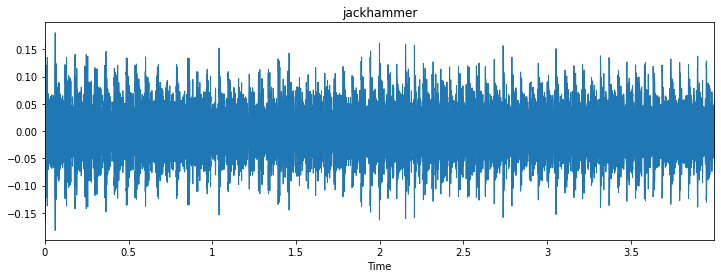

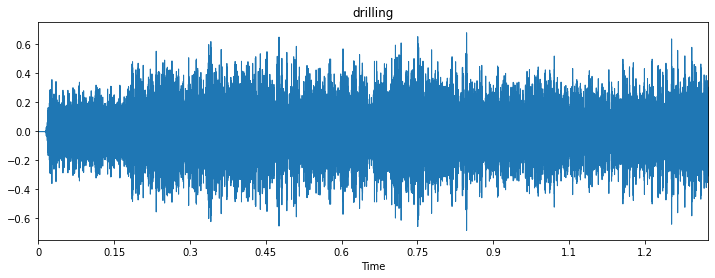

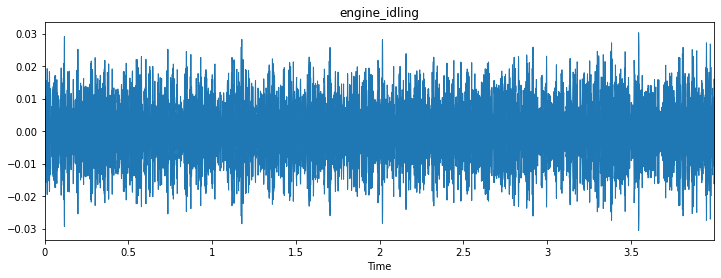

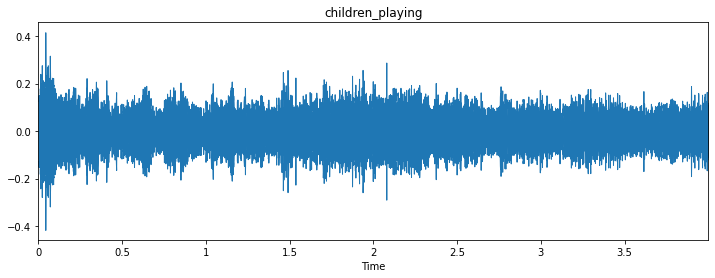

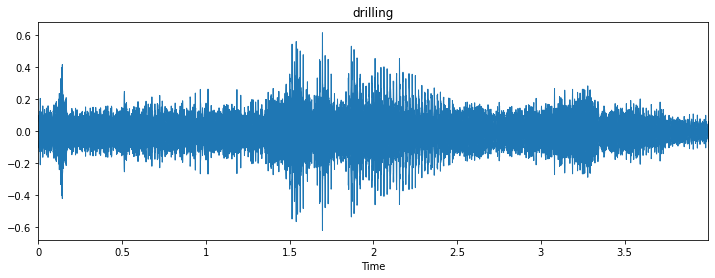

In [32]:
#Analysing random sound samples

arr = np.array(df["slice_file_name"])
fold = np.array(df["fold"])
cls = np.array(df["class"])

for i in range(190, 310, 25):
    path = 'C:/Users/Aniket/Desktop/PERSONAL PROJECTS/Urban Sound Classification/Dataset/fold' + str(fold[i]) + '/' + arr[i]
    d, sr = librosa.load(path)
    plt.figure(figsize=(12, 4))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(d)), ref=np.max)
    librosa.display.waveplot(d, sr)
    plt.title(cls[i])

In [33]:
print(f"{df.dtypes}\n")

slice_file_name     object
fsID                 int64
start              float64
end                float64
salience             int64
fold                 int64
classID              int64
class               object
dtype: object



In [34]:
print(f"Dataset Columns:\n{df.columns}")

Dataset Columns:
Index(['slice_file_name', 'fsID', 'start', 'end', 'salience', 'fold',
       'classID', 'class'],
      dtype='object')


In [35]:
print(f"The dataset shape: {df.shape}")

The dataset shape: (8732, 8)


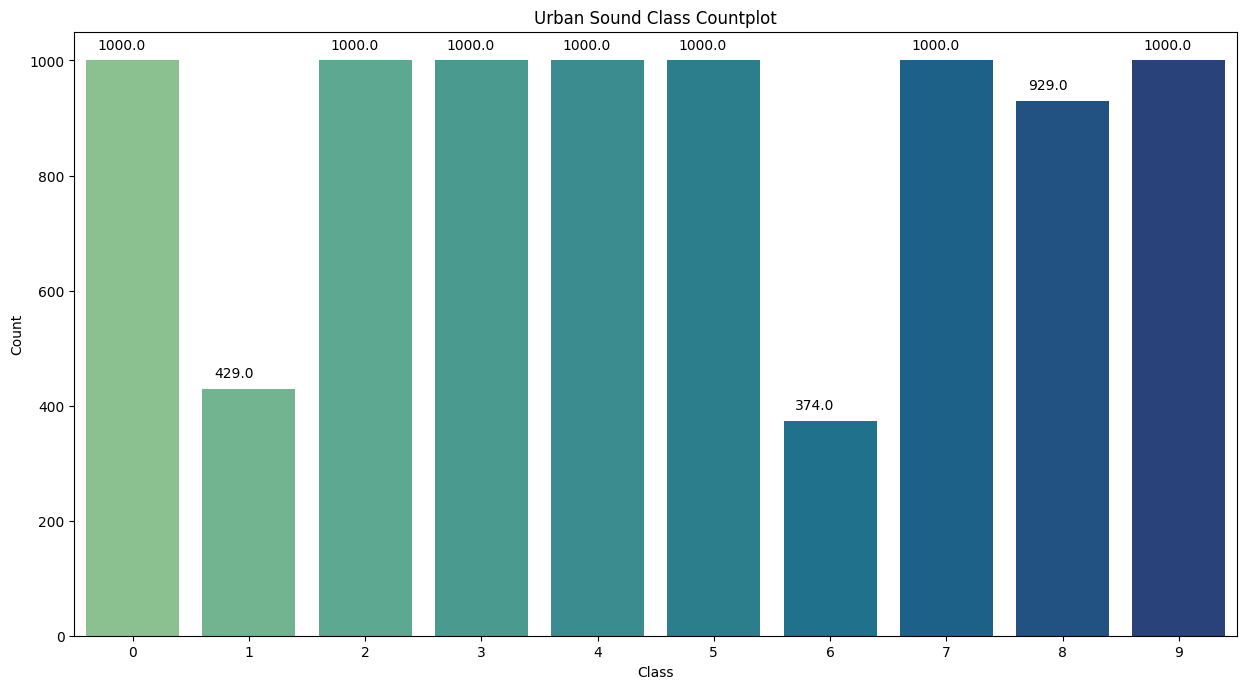

In [86]:
#Count Plot to show the number of occurences of each classID.

fig = plt.figure(figsize(15,8), dpi = 100)
cp = sns.countplot(x="classID", palette = 'crest', data = df, saturation = 1)
plt.title("Urban Sound Class Countplot")
plt.xlabel("Class")
plt.ylabel("Count")
for p in cp.patches:
        cp.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+20))
#fig.savefig('Fetal Health Countplot.png', bbox_inches= 'tight', pad_inches = 0.5)

In [111]:
def path_class(filename):
    excerpt = df[df['slice_file_name'] == filename]
    path_name = os.path.join('C:/Users/Aniket/Desktop/PERSONAL PROJECTS/Urban Sound Classification/Dataset', 'fold'+str(excerpt.fold.values[0]), filename)
    return path_name, excerpt['class'].values[0]

def wav_plotter(full_path, class_label):   
    rate, wav_sample = wav.read(full_path)
    wave_file = open(full_path,"rb")
    riff_fmt = wave_file.read(36)
    bit_depth_string = riff_fmt[-2:]
    bit_depth = struct.unpack("H",bit_depth_string)[0]
    print('Sampling Rate: ',rate,'Hz')
    print('Bit depth: ',bit_depth)
    print('Number of Channels: ',wav_sample.shape[1])
    print('Duration: ',wav_sample.shape[0]/rate,' seconds')
    print('Number of Samples: ',len(wav_sample))
    print('Class: ',class_label)
    plt.figure(figsize=(12, 4))
    plt.plot(wav_sample) 
    return ipd.Audio(full_path)

Sampling Rate:  44100 Hz
Bit depth:  16
Number of Channels:  2
Duration:  4.0  seconds
Number of Samples:  176400
Class:  children_playing


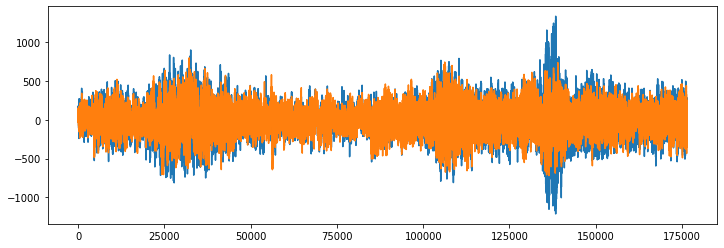

In [112]:
fullpath, label = path_class('100263-2-0-117.wav')
wav_plotter(fullpath,label)

Sampling Rate:  44100 Hz
Bit depth:  16
Number of Channels:  2
Duration:  4.0  seconds
Number of Samples:  176400
Class:  air_conditioner


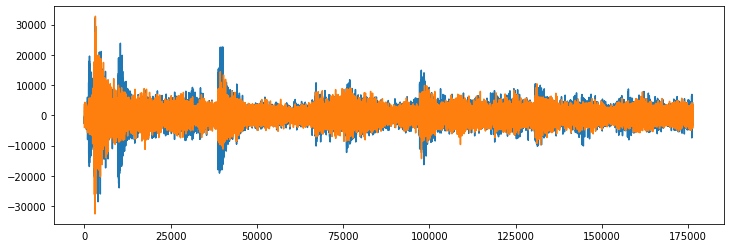

In [113]:
fullpath, label = path_class('74677-0-0-47.wav')
wav_plotter(fullpath,label)

Sampling Rate:  44100 Hz
Bit depth:  16
Number of Channels:  2
Duration:  1.32  seconds
Number of Samples:  58212
Class:  dog_bark


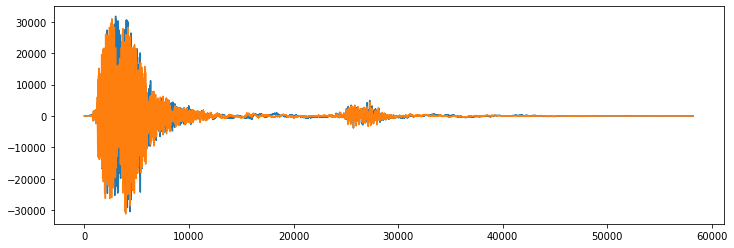

In [114]:
fullpath, label = path_class('89212-3-0-0.wav')
wav_plotter(fullpath,label)

Sampling Rate:  44100 Hz
Bit depth:  16
Number of Channels:  2
Duration:  4.0  seconds
Number of Samples:  176400
Class:  jackhammer


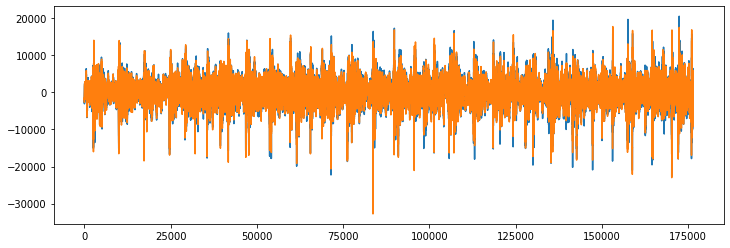

In [115]:
fullpath, label = path_class('30206-7-0-34.wav')
wav_plotter(fullpath,label)

Sampling Rate:  48000 Hz
Bit depth:  24
Number of Channels:  2
Duration:  4.0  seconds
Number of Samples:  192000
Class:  siren


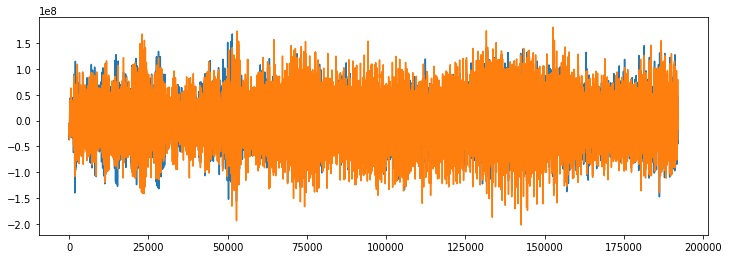

In [117]:
fullpath, label = path_class('159748-8-0-0.wav')
wav_plotter(fullpath,label)

## STEP 3 - Loading Audio Files and extracting features

In [55]:
feature = []
label = []

# Function to load files and extract features.
def parser(row):
    for i in range(8732):
        file_name = 'C:/Users/Aniket/Desktop/PERSONAL PROJECTS/Urban Sound Classification/Dataset/fold' + str(df["fold"][i]) + '/' + df["slice_file_name"][i]
        
        try:
            d, sr = librosa.load(file_name, res_type='kaiser_fast') 
            mels = np.mean(librosa.feature.melspectrogram(y=d, sr=sr).T,axis=0)        
            feature.append(mels)
            label.append(df["classID"][i])
        except Exception as e:
            print("Error encountered while parsing file: ", file)
            return None, None
 
    return [feature, label]

temp = parser(df)
temp = np.array(temp)
data = temp.transpose()

C:\Users\Aniket\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
C:\Users\Aniket\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
C:\Users\Aniket\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
<ipython-input-55-c79511a50cf1>:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp = np.array(temp)


In [60]:
X_ = data[:, 0]
Y = data[:, 1]
print(X_.shape, Y.shape)
X = np.empty([8732, 128])

(8732,) (8732,)


In [61]:
for i in range(8732):
    X[i] = (X_[i])
    
Y = to_categorical(Y)

In [63]:
# Final Data

print(X.shape)
print(Y.shape)

(8732, 128)
(8732, 10)


In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1)
X_train = X_train.reshape(6549, 16, 8, 1)
X_test = X_test.reshape(2183, 16, 8, 1)

## STEP 4 - Building the Keras Model

In [177]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding = "same", activation='tanh', input_shape=(16, 8, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='tanh', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(0.1))
model.add(Flatten())

model.add(Dense(1024, activation="tanh"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0005)
# early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

In [178]:
# history = model.fit(X_train, Y_train, epochs = 50, batch_size = 50, callbacks=[reduce_lr, early_stop], validation_data = (X_test, Y_test))
history = model.fit(X_train, Y_train, epochs = 100, batch_size = 50, validation_data = (X_test, Y_test))

Epoch 1/100
131/131 [==============================] - 1s 7ms/step - loss: 1.5399 - accuracy: 0.4734 - val_loss: 1.3714 - val_accuracy: 0.5295
Epoch 2/100
131/131 [==============================] - 1s 5ms/step - loss: 1.1422 - accuracy: 0.6146 - val_loss: 1.0875 - val_accuracy: 0.6454
Epoch 3/100
131/131 [==============================] - 1s 5ms/step - loss: 0.9597 - accuracy: 0.6763 - val_loss: 1.0142 - val_accuracy: 0.6862
Epoch 4/100
131/131 [==============================] - 1s 5ms/step - loss: 0.8543 - accuracy: 0.7120 - val_loss: 0.9714 - val_accuracy: 0.6839
Epoch 5/100
131/131 [==============================] - 1s 5ms/step - loss: 0.7619 - accuracy: 0.7473 - val_loss: 0.8826 - val_accuracy: 0.7352
Epoch 6/100
131/131 [==============================] - 1s 5ms/step - loss: 0.7067 - accuracy: 0.7697 - val_loss: 0.9368 - val_accuracy: 0.6977
Epoch 7/100
131/131 [==============================] - 1s 5ms/step - loss: 0.6513 - accuracy: 0.7871 - val_loss: 0.8225 - val_accuracy: 0.7453

Epoch 58/100
131/131 [==============================] - 1s 5ms/step - loss: 0.1238 - accuracy: 0.9571 - val_loss: 0.9006 - val_accuracy: 0.8282
Epoch 59/100
131/131 [==============================] - 1s 5ms/step - loss: 0.1102 - accuracy: 0.9630 - val_loss: 0.7950 - val_accuracy: 0.8516
Epoch 60/100
131/131 [==============================] - 1s 5ms/step - loss: 0.1009 - accuracy: 0.9661 - val_loss: 0.7890 - val_accuracy: 0.8488
Epoch 61/100
131/131 [==============================] - 1s 5ms/step - loss: 0.0929 - accuracy: 0.9684 - val_loss: 0.8060 - val_accuracy: 0.8539
Epoch 62/100
131/131 [==============================] - 1s 5ms/step - loss: 0.0845 - accuracy: 0.9711 - val_loss: 0.8279 - val_accuracy: 0.8511
Epoch 63/100
131/131 [==============================] - 1s 5ms/step - loss: 0.0730 - accuracy: 0.9757 - val_loss: 0.8195 - val_accuracy: 0.8511
Epoch 64/100
131/131 [==============================] - 1s 5ms/step - loss: 0.0744 - accuracy: 0.9754 - val_loss: 0.7804 - val_accuracy:

In [179]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 16, 8, 64)         640       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 8, 4, 64)          0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 8, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 4, 2, 128)         0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 4, 2, 128)         0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 1024)            

## STEP 5 - Testing the Keras Model and its performance

In [180]:
predictions = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print(score)

69/69 [==============================] - 0s 2ms/step - loss: 0.8344 - accuracy: 0.8685
[0.8343718647956848, 0.8685295581817627]


In [181]:
model.test_on_batch(X_test, Y_test)
print(model.metrics_names)

['loss', 'accuracy']


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


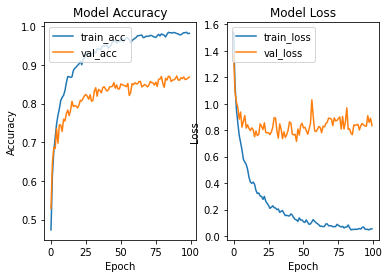

In [182]:
print(history.history.keys())

fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot Model Accuracy vs Epochs
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['train_acc', 'val_acc'], loc='upper left')

# Plot Model Loss vs Epochs
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['train_loss', 'val_loss'], loc='upper left')

In [186]:
predictions = model.predict(X_test)
predictions_classes = np.argmax(predictions, axis=1)
test_target_classes = np.argmax(Y_test, axis=1)
acc = accuracy_score(test_target_classes, predictions_classes)
print("Accuracy Score: ", acc)
corr_labels = accuracy_score(test_target_classes, predictions_classes, normalize=False)
print("Number of correctly predicted samples: ", corr_labels)

Accuracy Score:  0.8685295464956482
Number of correctly predicted samples:  1896


In [196]:
# Classification Report

report = classification_report(test_target_classes, predictions_classes, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.9322    0.9244    0.9283       238
           1     0.9375    0.8678    0.9013       121
           2     0.6992    0.7382    0.7182       233
           3     0.7937    0.7195    0.7548       246
           4     0.9367    0.8605    0.8970       258
           5     0.9254    0.9725    0.9484       255
           6     0.9091    0.9091    0.9091        99
           7     0.9143    0.9624    0.9377       266
           8     0.8607    0.9417    0.8994       223
           9     0.8235    0.8033    0.8133       244

    accuracy                         0.8685      2183
   macro avg     0.8732    0.8699    0.8707      2183
weighted avg     0.8691    0.8685    0.8679      2183



In [188]:
cm = confusion_matrix(test_target_classes, predictions_classes)
print(cm)

[[220   0   6   3   1   1   1   0   0   6]
 [  1 105   2   3   2   1   0   0   1   6]
 [  4   0 172  26   2   6   0   1  12  10]
 [  0   2  34 177   3   3   1   2  15   9]
 [  0   2   8   3 222   0   3  11   2   7]
 [  0   0   2   1   0 248   0   1   2   1]
 [  0   0   5   0   2   0  90   2   0   0]
 [  2   0   2   0   3   0   1 256   0   2]
 [  1   0   3   5   0   2   0   1 210   1]
 [  8   3  12   5   2   7   3   6   2 196]]


[Text(0, 0.5, '0'),
 Text(0, 1.5, '1'),
 Text(0, 2.5, '2'),
 Text(0, 3.5, '3'),
 Text(0, 4.5, '4'),
 Text(0, 5.5, '5'),
 Text(0, 6.5, '6'),
 Text(0, 7.5, '7'),
 Text(0, 8.5, '8'),
 Text(0, 9.5, '9')]

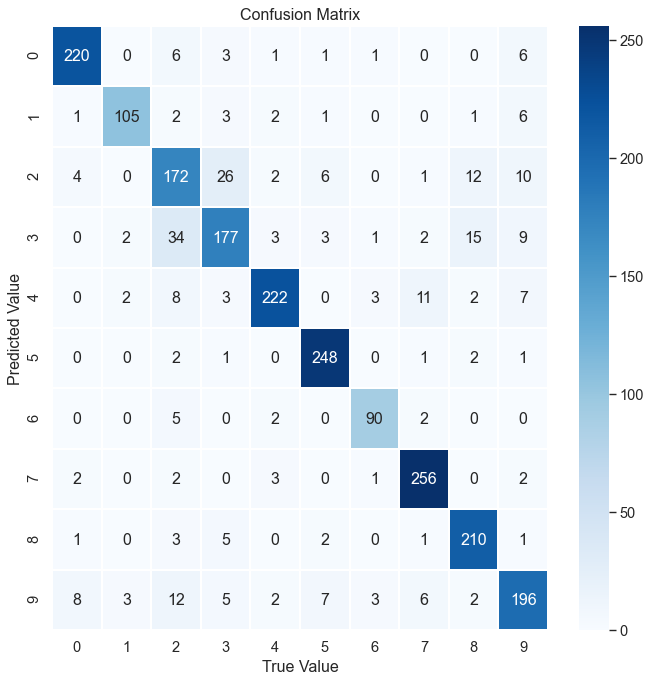

In [195]:
# Confusion Matrix

sns.set(font_scale=1.2)
fig = plt.figure(figsize=(10, 10), dpi=80)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt="d", linewidths=0.2)
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
ax.yaxis.set_ticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

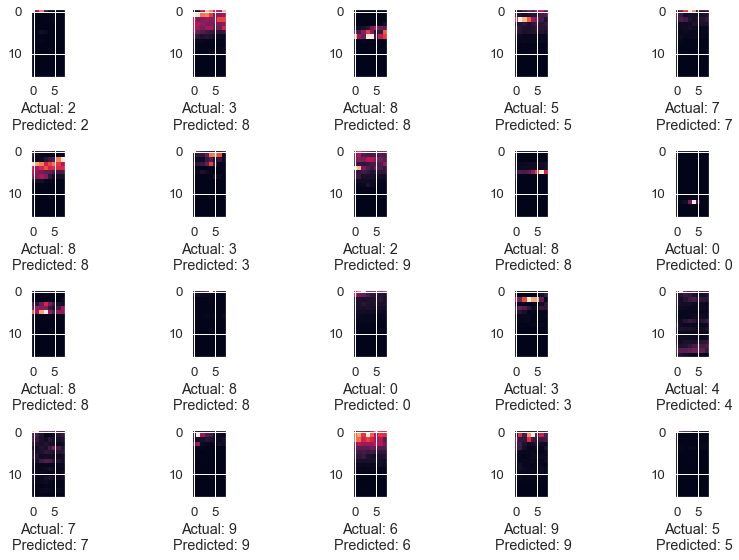

In [201]:
# Prediction examples

plt.figure(figsize=(12, 8))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_test[i])
    plt.xlabel(f"Actual: {test_target_classes[i]}\n Predicted: {predictions_classes[i]}")

plt.tight_layout()